In [262]:
# Task: Investigate the years (and potentially months) when I have some data per location

In [263]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt

In [264]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT0E0Y7txIa2pfBuusA1cd8X5OVhQ_D0qZC8D40KhTU3xB7McsPR2kuB7GH6ncmNT3nfjEYGbscOPp0/pub?gid=0&single=true&output=csv')

In [265]:
df = df.fillna('')

In [266]:
YEAR_RANGE = (1900, 1950)

years = {}
year_months = {}
year_counter = {}
year_counter_num_performers = {}


for ix, row in df.iterrows():
    try:
        date = dt.strptime(row.Date, '%Y-%m-%d')
    except:
        continue
        
    if row['Exclude from visualization'] or row['Unsure whether drag artist']:
        continue
    
    if row['Normalized City'] == '' or row['Normalized City'] == '—':
        continue
    
    if not YEAR_RANGE[0] <= date.year <= YEAR_RANGE[1]:
        continue
    
    city = row['Normalized City']
    
    year = f'{date.year}'
    year_month = f'{date.year}-{date.month:02}'
    
    if not year_month in year_months:
        year_months[year_month] = []
    if not year in years:
        years[year] = []
    year_months[year_month].append(city)
    years[year].append(city)

    if not city in year_counter:
        year_counter[city] = {}
    if not year in year_counter[city]:
        year_counter[city][year] = 0
    
    year_counter[city][year] += 1
    
    if row['Normalized performer'] == '' or row['Normalized performer'] == '—':
        continue
        
    # exclude unnamed
    if 'unnamed' in row['Normalized performer'].lower():
        continue
        
    if not city in year_counter_num_performers:
        year_counter_num_performers[city] = {}
    if not year in year_counter_num_performers[city]:
        year_counter_num_performers[city][year] = []
        
    year_counter_num_performers[city][year].append(row['Normalized performer'])
    


In [267]:
year_months = {k: list(set(v)) for k,v in year_months.items()}
years = {k: list(set(v)) for k,v in years.items()}
_year_counter_num_performers = {}

for city, p in year_counter_num_performers.items():
    for year, performers in p.items():
        if not city in _year_counter_num_performers:
            _year_counter_num_performers[city] = {}
        if not year in _year_counter_num_performers[city]:
            _year_counter_num_performers[city][year] = []
        _year_counter_num_performers[city][year] = list(set(performers))
        
year_counter_num_performers = _year_counter_num_performers
year_counter_num_performers

{'Boston, MA': {'1909': ['— Marshall'],
  '1936': ['Karyl Norman', 'Jackie Maye'],
  '1939': ['Richard Snooks Davis', 'Francis Renault'],
  '1941': ['Dixie Day'],
  '1943': ['Merry Pickford'],
  '1948': ['Champagne',
   'Dom Tangee',
   'Bobby Mason',
   'Merry Pickford',
   'Roxy King'],
  '1949': ['Bob Smith'],
  '1930': ['Francis Renault'],
  '1931': ['Francis Renault'],
  '1933': ['Francis Renault'],
  '1934': ['Francis Renault'],
  '1937': ['Francis Renault']},
 'Chicago, IL': {'1909': ['Edward Delange'],
  '1911': ['Andrew Tribble', '— Williams'],
  '1913': ['Thelma the Great'],
  '1915': ['Francis Renault', '— Lewis', 'Charley Anderson'],
  '1918': ['James Riley'],
  '1920': ['Frank Tymm'],
  '1927': ['Bobby Grant'],
  '1929': ['Harry Dowling'],
  '1930': ['Tex Hendricks'],
  '1931': ['Sepia Gloria Swanson', 'Peggy Joyce'],
  '1932': ['Sepia Gloria Swanson',
   'Karyl Norman',
   'Francis Renault',
   'Leon LaVerde'],
  '1933': ['George Oliver',
   'Bobbie La Marr',
   'F & G Do

In [268]:
df_counter = pd.DataFrame()

for city, counter in year_counter.items():
    s = pd.Series(counter, name=city)
    s = pd.to_numeric(s, downcast='integer')
    df_counter = df_counter.append(s)
    
top_50_cities = df_counter.sum(axis=1).sort_values(ascending=False)[:50].index
print(top_50_cities)

def interpolate(col, MIN=1, MAX=10):
    return np.interp(col, (col.min(), col.max()), (MIN, MAX))

df_interpolated = df_counter.apply(lambda col: interpolate(col), axis=0)
log_counter = np.log(df_interpolated)
log_counter = log_counter.fillna(0)
log_counter = log_counter.astype(int)

Index(['New York, NY', 'Miami, FL', 'Chicago, IL', 'Albany, NY', 'Detroit, MI',
       'Cincinnati, OH', 'San Francisco, CA', 'Los Angeles, CA',
       'Syracuse, NY', 'East Liverpool, OH', 'Kansas City, MO',
       'Benton Harbor, MI', 'Lansing, MI', 'Pittsburgh, PA', 'Reno, NV',
       'Philadelphia, PA', 'Baltimore, MD', 'Akron, OH', 'Warren, PA',
       'Dayton, OH', 'Saratoga Springs, NY', 'Hartford, CT',
       'Atlantic City, NJ', 'Sacramento, CA', 'Cleveland, OH', 'Buffalo, NY',
       'Jamestown, NY', 'South Bend, IN', 'St. Louis, MO', 'Massillon, OH',
       'Indianapolis, IN', 'Nashville, TN', 'Boston, MA', 'New Orleans, LA',
       'Des Moines, IA', 'Louisville, KY', 'Sandusky, OH', 'Minneapolis, MN',
       'Rochester, NY', 'Youngstown, OH', 'Binghamton, NY', 'Palm Beach, FL',
       'Washington DC', 'Columbus, OH', 'Scranton, PA', 'Asbury Park, NJ',
       'Hazleton, PA', 'Olean, NY', 'Pottstown, PA', 'Paterson, NJ'],
      dtype='object')


In [269]:
df_counter.loc[top_50_cities]

,1909,1930,1931,1933,1934,1936,1937,1939,1941,1943,...,1922,1923,1942,1946,1921,1924,1925,1926,1928,1919
"New York, NY",NaN,146.0,127.0,46.0,199.0,68.0,15.0,36.0,10.0,8.0,...,NaN,2.0,1.0,3.0,1.0,4.0,8.0,18.0,40.0,NaN
"Miami, FL",NaN,NaN,NaN,24.0,148.0,4.0,4.0,266.0,6.0,25.0,...,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Chicago, IL",1.0,1.0,5.0,216.0,101.0,30.0,12.0,36.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Albany, NY",NaN,NaN,NaN,NaN,62.0,NaN,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Detroit, MI",NaN,5.0,NaN,3.0,1.0,3.0,54.0,9.0,31.0,3.0,...,NaN,NaN,140.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"Cincinnati, OH",NaN,NaN,NaN,6.0,24.0,17.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"San Francisco, CA",NaN,NaN,NaN,13.0,NaN,3.0,11.0,9.0,26.0,8.0,...,1.0,1.0,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"Los Angeles, CA",NaN,1.0,NaN,42.0,1.0,16.0,NaN,1.0,1.0,5.0,...,NaN,NaN,5.0,11.0,NaN,NaN,NaN,2.0,2.0,NaN
"Syracuse, NY",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"East Liverpool, OH",NaN,NaN,NaN,NaN,NaN,175.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

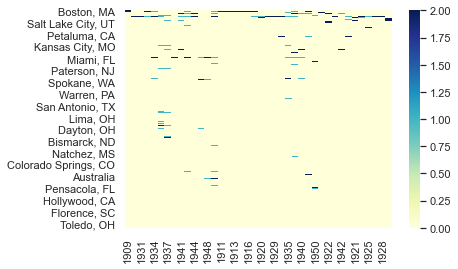

In [270]:
sns.heatmap(log_counter, cmap="YlGnBu")

In [271]:
all_performers = []
for city, p in year_counter_num_performers.items():
    for year, performers in p.items():
        all_performers.extend(performers)
        
all_performers = list(set(all_performers))

In [272]:
performer_df = pd.DataFrame(index=all_performers, columns=[str(x) for x in range(1900,1951)])

In [273]:
for city, p in year_counter_num_performers.items():
    for year, performers in p.items():
        for performer in performers:
            performer_df.loc[performer][year] = 1
            
performer_df = performer_df.fillna(0)

In [287]:

# .sum(axis=1).sort_values(ascending=False)
top_50_performers = performer_df.sum(axis=1).sort_values(ascending=False).index
top_50 = performer_df.loc[top_50_performers]
top_50.sum(axis=1)

Karyl Norman                23
Francis Renault             20
Rae Bourbon                 17
Jackie Maye                 16
Billy "Senorita" Herrera    15
                            ..
Fifi                         1
Clark? Roberts?              1
Terry Stone                  1
Bonnie                       1
Fredricka                    1
Length: 746, dtype: int64

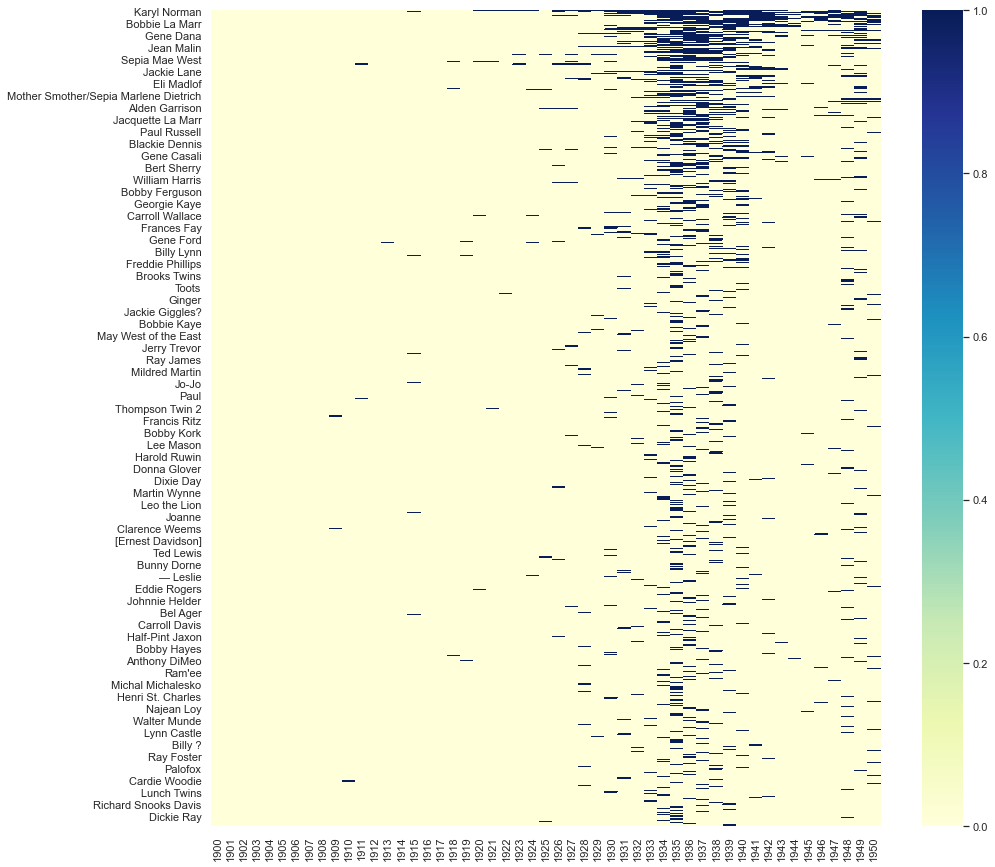

In [286]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(top_50, cmap="YlGnBu")